# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruting_costs`, `salary_grid`.

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# заводим данные для подключения к PostgreSQL
pg_connection = {
    'host': 'dsstudents.skillbox.ru',
    'port': 5432,
    'dbname': 'human_resources',
    'user': 'readonly',
    'password': '6hajV34RTQfmxhS',
}

##### Гипотеза: 

Чем старше сотрудник, тем выше его показатель производительности

Соединение с базой данных установлено...


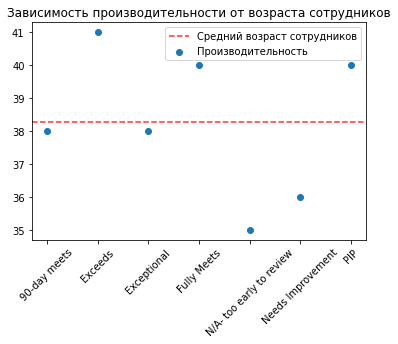

In [3]:
# подключение к PostgreSQL
conn = psycopg2.connect(**pg_connection)
print('Соединение с базой данных установлено...')
cursor = conn.cursor()

# получение и обработка данных
sql_str = 'SELECT "Performance Score", Round(AVG(age), 0) as Average_Age FROM hr_dataset GROUP BY "Performance Score" ORDER BY "Performance Score"'
cursor.execute(sql_str)
columns = [d.name for d in cursor.description]
tables_data = [a for a in cursor.fetchall()]
result = pd.DataFrame(tables_data, columns = columns)

# визуализация данных
plt.scatter(result['Performance Score'].values, result['average_age'].values, label = 'Производительность')
plt.axhline(result['average_age'].mean(), label = 'Средний возраст сотрудников', linestyle = '--', color = 'r', alpha = 0.8)
plt.xticks(result['Performance Score'].values, rotation = 45)
plt.title('Зависимость производительности от возраста сотрудников')
plt.legend(loc = 'best')
plt.show()

# закрытие соединения
cursor.close()
conn.close()

Выводы:

- наибольшему показателю производительности соответствуют сотрудники старшего возраста
- до достижения полного соответствия целевым показателям новым сотрудникам требуется от 2 до 5 лет стажа

##### Гипотеза:

Для набора сотрудников в конкретный отдел нужен определенный канал привлечения с определенным бюджетом

In [4]:
# подключение к PostgreSQL
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()
# получение данных
sql_str = 'SELECT hr.department as "Отдел", hr."Employee Source" as "Источник найма", COUNT(hr.id) as "Нанято сотрудников", (COUNT(hr.id)*cost.cost_by_1) as "Общие затраты на найм" FROM hr_dataset as hr LEFT JOIN (SELECT hr."Employee Source", (cost."Total"/COUNT(hr.id)) as cost_by_1 FROM hr_dataset as hr LEFT JOIN recruiting_costs as cost ON hr."Employee Source" = cost."Employment Source" GROUP BY hr."Employee Source", cost."Total") as cost ON hr."Employee Source" = cost."Employee Source" GROUP BY hr.department, hr."Employee Source", cost.cost_by_1 ORDER BY hr.department, "Нанято сотрудников" DESC'
cursor.execute(sql_str)
columns = [d.name for d in cursor.description]
tables_data = [a for a in cursor.fetchall()]
result = pd.DataFrame(tables_data, columns = columns)

# закрытие соединения
cursor.close()
conn.close()

In [5]:
result

,Отдел,Источник найма,Нанято сотрудников,Общие затраты на найм
0,Admin Offices,Diversity Job Fair,4,1380.0
1,Admin Offices,Website Banner Ads,2,1098.0
2,Admin Offices,Monster.com,1,240.0
3,Admin Offices,Internet Search,1,0.0
4,Admin Offices,Pay Per Click - Google,1,167.0
5,Admin Offices,Other,1,443.0
6,Executive Office,Pay Per Click - Google,1,167.0
7,IT/IS,Employee Referral,13,0.0
8,IT/IS,Indeed,8,NaN
9,IT/IS,Vendor Referral,8,0.0


##### Выводы:
- наибольшие затраты на привлечение персонала потрачены на отдел Production
- в отдел IT большинство сотрудников привлекается через рекомендации, возможно стоит внедрить бонусную систему для сотрудников, например "Приведи друга-специалиста и получи бонус"

##### Гипотеза:

От семейного положения сотрудника зависит уровень его дохода

In [6]:
# устанавливаем соединение
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

# загружаем данные
sql_str = 'SELECT hr.marriedid, hr."Performance Score", COUNT(hr.id) as Count_High_Score, ROUND(AVG(salary."Salary Mid"), 2) as Mean_Salary FROM hr_dataset as hr LEFT JOIN salary_grid as salary ON hr.position = salary."Position" GROUP BY hr.marriedid, hr."Performance Score" ORDER BY hr.marriedid, hr."Performance Score"'
cursor.execute(sql_str)
columns = [d.name for d in cursor.description]
tables_data = [a for a in cursor.fetchall()]
result = pd.DataFrame(tables_data, columns = columns)


# закрываем соединение
cursor.close()
conn.close()

result

,marriedid,Performance Score,count_high_score,mean_salary
0,0,90-day meets,16,59577.25
1,0,Exceeds,18,42909.09
2,0,Exceptional,8,48861.20
3,0,Fully Meets,108,44398.93
4,0,N/A- too early to review,23,50027.00
5,0,Needs Improvement,9,41333.33
6,0,PIP,5,44000.00
7,1,90-day meets,15,49630.00
8,1,Exceeds,10,41777.78
9,1,Exceptional,1,68306.00


##### Выводы: 

- люди с семьей при полном соответствии качеству зарабатывают на 6% больше, чем люди без жены/мужа
- при этом людей с полным соответствие качеству больше среди людей без семейного положения

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

In [10]:
import vk
import time
import sys
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import re

token = '02#####'
session = vk.Session(access_token = token)
vk_api = vk.API(session)
# id группы в вк
my_id = 20526988
public_id = 66669811

In [11]:
# подготовка вспомогательных данных 
date_list = []
text_list = []
views = []
likes = []
comments = []
reposts = []
reg_expr = r'[#]\w+'
reg_expr_compiled = re.compile(reg_expr)
offset = 0
max_counts = 1000

# загрузка данных из Вконтакте
while offset < max_counts:
    items = vk_api.wall.get(owner_id = -public_id, offset = offset, count = 100, v = 5.118)
    for item in items['items']:
        date_list.append(item['date'])
        text_list.append(item['text'])
        views.append(item['views']['count'])
        likes.append(item['likes']['count'])
        comments.append(item['comments']['count'])
        reposts.append(item['reposts']['count'])
    offset += len(items['items'])
    
# сведение данных в датасет
dataset = pd.DataFrame(date_list, columns = ['Дата поста'])
dataset['Дата поста'] = pd.to_datetime(dataset['Дата поста'].apply(lambda x: time.ctime(x)))
dataset['Текст поста'] = text_list
dataset['Хэштеги'] = dataset['Текст поста'].apply(lambda x: reg_expr_compiled.findall(x))
dataset['Просмотры'] = views
dataset['Лайки'] = likes
dataset['Комменты'] = comments
dataset['Репосты'] = reposts
dataset.sort_values(by = 'Дата поста', ascending = False, inplace = True)

In [12]:
dataset.head()

,Дата поста,Текст поста,Хэштеги,Просмотры,Лайки,Комменты,Репосты
0,2020-07-13 20:02:47,"“SMM-щик - это тот, кто пишет посты за деньги”...",[#Статья_Skillbox],8770,35,0,7
1,2020-07-13 13:21:33,Новая неделя будет продуктивной 💪 В этот раз м...,[#Расписание_Skillbox],10115,22,4,2
2,2020-07-13 11:10:31,"В дизайне помогает не только насмотренность, н...","[#Skillbox_Дизайн, #В_Закладки_Skillbox]",12298,76,0,12
3,2020-07-12 13:07:29,Продолжаем изучать HTML!\nНа очереди еще три б...,"[#Skillbox_программирование, #Учим_HTML]",18749,91,3,12
4,2020-07-11 12:07:43,Бумага все стерпит!\n\nПримерно так мог бы зву...,"[#Упаковка_Skillbox, #Skillbox_дизайн]",18881,65,3,6


**Для анализа выбираем период с 01 февраля 2020 по 30 июня 2020, чтобы проанализировать активность участников группы с начала периода самоизоляции в России до первых этапов его окончания.**

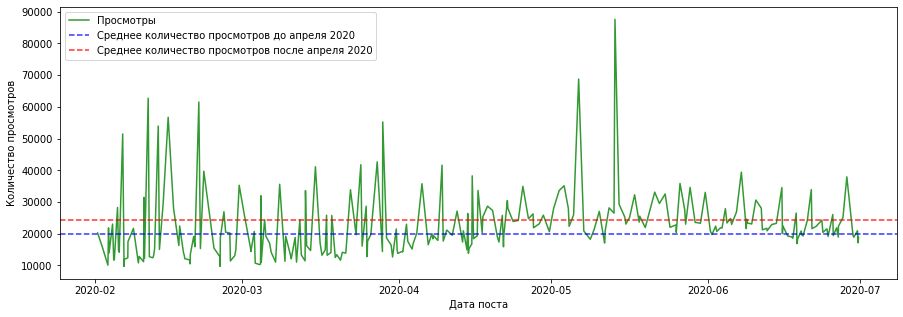

Рост среднего количества просмотров после апреля 2020 составляет 1.21


In [65]:
data = dataset[(dataset['Дата поста'] > '2020-02-01') & (dataset['Дата поста'] < '2020-07-01')].copy().reset_index()
plt.figure(figsize = (15,5))
plt.xlabel('Дата поста')
plt.ylabel('Количество просмотров')
plt.plot(data['Дата поста'], data['Просмотры'], color = 'g', alpha = 0.8, label = 'Просмотры')
plt.axhline(data[data['Дата поста'] < '2020-04-01']['Просмотры'].mean(), color = 'b', linestyle = '--', alpha = 0.8, label = "Среднее количество просмотров до апреля 2020")
plt.axhline(data[data['Дата поста'] > '2020-04-01']['Просмотры'].mean(), color = 'r', linestyle = '--', alpha = 0.8, label = 'Среднее количество просмотров после апреля 2020')
plt.legend()
plt.show()
print('Рост среднего количества просмотров после апреля 2020 составляет {}'.format(round(data[data['Дата поста'] > '2020-04-01']['Просмотры'].mean()/data[data['Дата поста'] < '2020-04-01']['Просмотры'].mean(), 2)))

**Выводы:** на основе графика можно сделать о росте активности в группе на 21%, начиная с апреля 2020.

**Анализируем зависимость активности от времени размещения поста**

In [66]:
# разбиваем сутки на 12 периодов и делаем признак времени поста категориальным
time_period_name = {1: '00:00 - 02:00',
                  2: '02:00 - 04:00',
                  3: '04:00 - 06:00',
                  4: '06:00 - 08:00',
                  5: '08:00 - 10:00',
                  6: '10:00 - 12:00',
                  7: '12:00 - 14:00',
                  8: '14:00 - 16:00',
                  9: '16:00 - 18:00',
                  10: '18:00 - 20:00',
                  11: '20:00 - 22:00',
                  12: '22:00 - 24:00'}
time_period = {1: (0,2),
              2: (2,4),
              3: (4,6),
              4: (6,8),
              5: (8,10),
              6: (10,12),
              7: (12,14),
              8: (14,16),
              9: (16,18),
              10: (18,20),
              11: (20,22),
              12: (22,24)}

# функция установки времени публикации
def set_time_period(data):
    result = []
    for item in data:
        for key, value in time_period.items():
            if value[0] == 22:
                if (item.time() > dt.time(value[0], 0, 0)) and (item.time() < dt.time(23, 59, 59)):
                    result.append(key)
                    break
            elif (item.time() > dt.time(value[0], 0, 0)) and(item.time() < dt.time(value[1], 0, 0)):
                result.append(key)
    return result

# добавляем период в датасет
period = pd.Series(set_time_period(data['Дата поста']))
data['Время публикации'] = period.apply(lambda x: time_period_name[x])
data.head()

,index,Дата поста,Текст поста,Хэштеги,Просмотры,Лайки,Комменты,Репосты,Время публикации
0,24,2020-06-30 18:51:28,"А вы задумывались, зачем нужен дизайн? Ну, кро...",[#Статья_Skillbox],18857,82,4,14,18:00 - 20:00
1,25,2020-06-30 16:33:12,Какое жаркое начало июля в онлайн-Лектории Ski...,[#Лекторий_Skillbox],17129,29,3,2,16:00 - 18:00
2,26,2020-06-30 14:03:47,"Если вы видите этот пост, значит, вас можно по...","[#SMDay, #Skillbox_маркетинг, #В_закладки_Skil...",20934,67,5,1,14:00 - 16:00
3,27,2020-06-29 20:26:24,— Какие три мировых тренда будут актуальны в м...,"[#Skillbox_Программирование, #Статья_Skillbox]",18908,38,0,1,20:00 - 22:00
4,28,2020-06-29 17:17:18,С нами скучать не приходится — на этой неделе ...,[#Расписание_Skillbox],19369,39,8,1,16:00 - 18:00


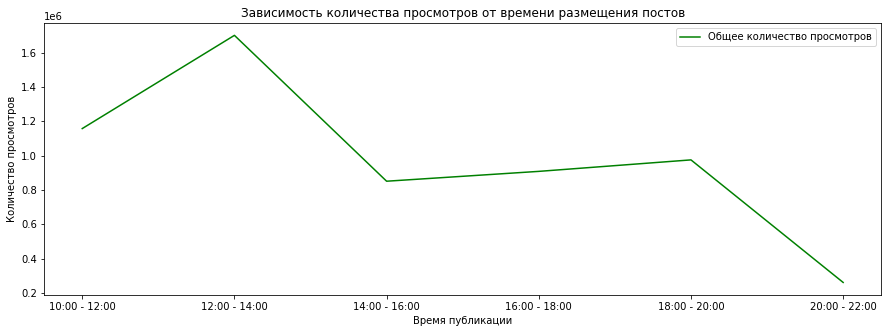

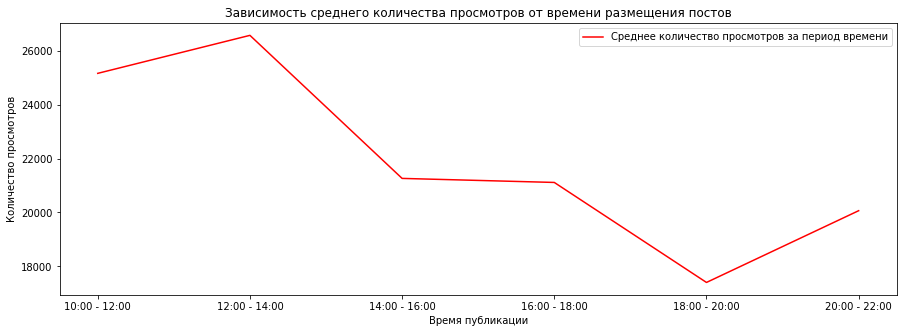

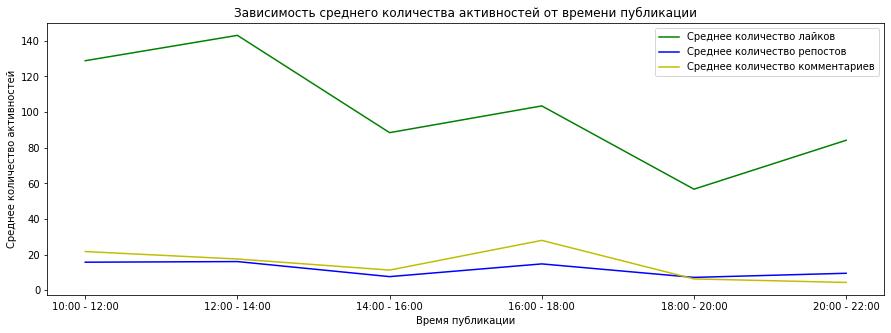

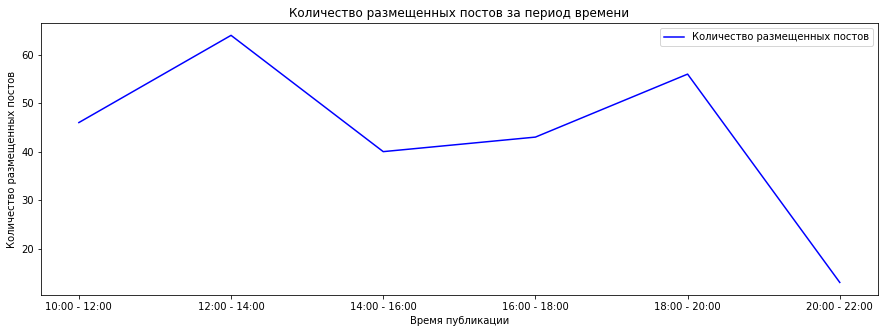

In [74]:
# группируем значения по времени публикаци
result_df = data.groupby(['Время публикации'])['Просмотры'].sum().reset_index()
count_df = data.groupby(['Время публикации'])['Текст поста'].count().reset_index()
likes_df = data.groupby(['Время публикации'])['Лайки'].mean().reset_index()
comments_df = data.groupby(['Время публикации'])['Комменты'].mean().reset_index()
reposts_df = data.groupby(['Время публикации'])['Репосты'].mean().reset_index()
mean_df = data.groupby(['Время публикации'])['Просмотры'].mean().reset_index()
result_df['Среднее количество просмотров'] = mean_df['Просмотры']
result_df['Среднее количество лайков'] = likes_df['Лайки']
result_df['Среднее количество комментов'] = comments_df['Комменты']
result_df['Среднее количество репостов'] = reposts_df['Репосты']
result_df['Количество постов'] = count_df['Текст поста']

# визуализируем результаты
plt.figure(figsize = (15, 5))
plt.title('Зависимость количества просмотров от времени размещения постов')
plt.xlabel('Время публикации')
plt.ylabel('Количество просмотров')
plt.plot(result_df['Время публикации'], result_df['Просмотры'], color = 'g', label = 'Общее количество просмотров')
plt.legend()
plt.show()

plt.figure(figsize = (15, 5))
plt.title('Зависимость среднего количества просмотров от времени размещения постов')
plt.xlabel('Время публикации')
plt.ylabel('Количество просмотров')
plt.plot(result_df['Время публикации'], result_df['Среднее количество просмотров'], color = 'r', label = 'Среднее количество просмотров за период времени')
plt.legend()
plt.show()

plt.figure(figsize = (15,5))
plt.title('Зависимость среднего количества активностей от времени публикации')
plt.xlabel('Время публикации')
plt.ylabel('Среднее количество активностей')
plt.plot(result_df['Время публикации'], result_df['Среднее количество лайков'], color = 'g', label = 'Среднее количество лайков')
plt.plot(result_df['Время публикации'], result_df['Среднее количество репостов'], color = 'b', label = 'Среднее количество репостов')
plt.plot(result_df['Время публикации'], result_df['Среднее количество комментов'], color = 'y', label = 'Среднее количество комментариев')
plt.legend()
plt.show()

plt.figure(figsize = (15,5))
plt.title('Количество размещенных постов за период времени')
plt.xlabel('Время публикации')
plt.ylabel('Количество размещенных постов')
plt.plot(result_df['Время публикации'], result_df['Количество постов'], color = 'b', label = 'Количество размещенных постов')
plt.legend()
plt.show()

**Анализируем частоту вхождения тегов, отбираем топ-10 тегов по количеству встреч и анализируем реакцию сообщества на эти теги**

In [125]:
tags = {}
# считаем количество вхождений тегов
for tag in dataset['Хэштеги']:
    for item in tag:
        if item not in tags.keys():
            tags.setdefault(item, 1)
        else:
            tags[item] += 1
# переводим полученные данные в датасет
tags_df = pd.DataFrame(tags.keys(), columns = ['Хэштег'])
tags_df['Вхождений'] = tags.values()
tags_df.sort_values(by = 'Вхождений', ascending = False, inplace = True)
# выделяем топ-10
tags5 = tags_df.head(10).copy()
tags5

,Хэштег,Вхождений
7,#Skillbox_дизайн,214
0,#Статья_Skillbox,181
9,#Skillbox_маркетинг,96
4,#Skillbox_программирование,91
185,#read,72
10,#В_закладки_Skillbox,67
25,#Skillbox_управление,63
1,#Расписание_Skillbox,54
186,#marketing,38
188,#design,37


In [126]:
# подготовка вспомогательных данных
tag_list = []
views_list = []
likes_list = []
comments_list = []
reposts_list = []

# собираем датасет с информацией о постах по нужным нам тегам
for tag in tags5['Хэштег']:
    for index in range(len(dataset.index)):
        for item in dataset.iloc[index]['Хэштеги']:
            if tag == item:
                tag_list.append(tag)
                views_list.append(dataset.iloc[index]['Просмотры'])
                likes_list.append(dataset.iloc[index]['Лайки'])
                comments_list.append(dataset.iloc[index]['Комменты'])
                reposts_list.append(dataset.iloc[index]['Репосты'])
                break
                
result_df = pd.DataFrame(tag_list, columns = ['Хэштег'])
result_df['Просмотры'] = views_list
result_df['Лайки'] = likes_list
result_df['Комменты'] = comments_list
result_df['Репосты'] = reposts_list
result_df = result_df.groupby('Хэштег').mean().reset_index()

In [136]:
result_df

,Хэштег,Просмотры,Лайки,Комменты,Репосты
0,#Skillbox_дизайн,16583.528037,95.817757,10.238318,11.322430
1,#Skillbox_маркетинг,16144.937500,88.364583,11.812500,12.937500
2,#Skillbox_программирование,16756.824176,82.230769,8.593407,9.868132
3,#Skillbox_управление,15885.460317,67.507937,6.968254,10.507937
4,#design,13542.108108,97.162162,0.810811,24.054054
5,#marketing,12482.631579,81.894737,1.000000,22.500000
6,#read,10083.277778,60.236111,0.847222,14.513889
7,#В_закладки_Skillbox,29469.074627,191.716418,10.283582,27.179104
8,#Расписание_Skillbox,14442.113208,52.094340,10.584906,4.735849
9,#Статья_Skillbox,13050.049724,62.762431,3.508287,9.834254


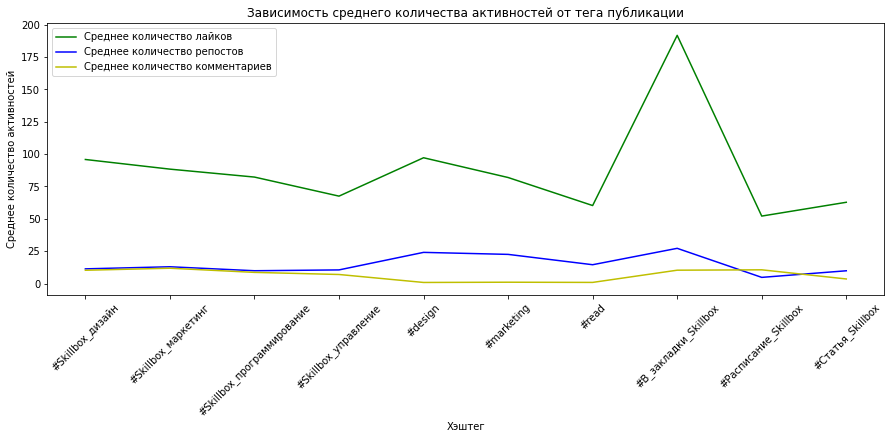

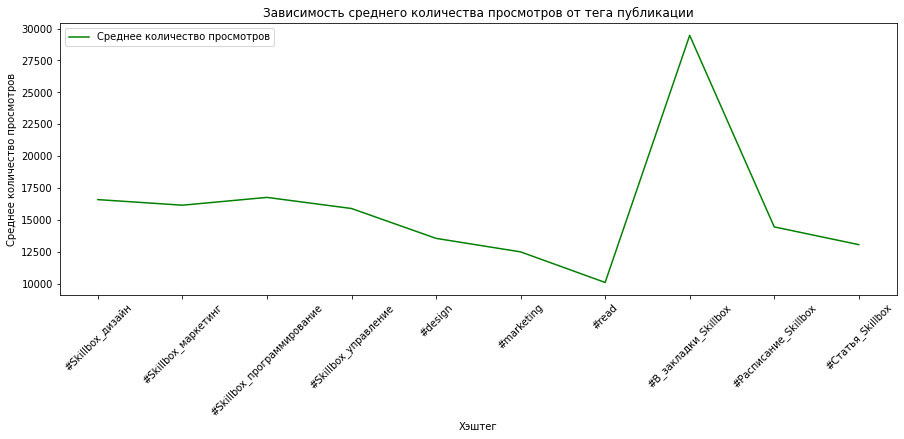

In [134]:
# визуализируем результаты
plt.figure(figsize = (15,5))
plt.title('Зависимость среднего количества активностей от тега публикации')
plt.xlabel('Хэштег')
plt.ylabel('Среднее количество активностей')
plt.plot(result_df['Хэштег'], result_df['Лайки'], color = 'g', label = 'Среднее количество лайков')
plt.plot(result_df['Хэштег'], result_df['Репосты'], color = 'b', label = 'Среднее количество репостов')
plt.plot(result_df['Хэштег'], result_df['Комменты'], color = 'y', label = 'Среднее количество комментариев')
plt.xticks(result_df['Хэштег'], rotation = 45, label = result_df['Хэштег'])
plt.legend()
plt.show()

plt.figure(figsize = (15,5))
plt.title('Зависимость среднего количества просмотров от тега публикации')
plt.xlabel('Хэштег')
plt.ylabel('Среднее количество просмотров')
plt.plot(result_df['Хэштег'], result_df['Просмотры'], color = 'g', label = 'Среднее количество просмотров')
plt.xticks(result_df['Хэштег'], rotation = 45, label = result_df['Хэштег'])
plt.legend()
plt.show()

### Перечень рекомендаций для SMM-отдела

1) В связи с ростом активности сообщества на фоне самоизоляции рекомендуем увеличить бюджет на маркетинг

2) Посты с полезной для участников информацией, а также продающие посты, лучше писать в период с 12:00 - 14:00, однако, если необходимо вовлечение от участников в виде комментариев и репостов, то посты в виде обсуждений, опросов, рекомендую размещать в период с 16:00 - 18:00

3) Рубрика "В закладки_Skillbox" является наиболее просматриваемой, поскольку привлекает наибольшее количество репостов, поэтому стоит сделать акцент на изучение потребностей пользователей и размещать полезную и актуальную информацию